In [3]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

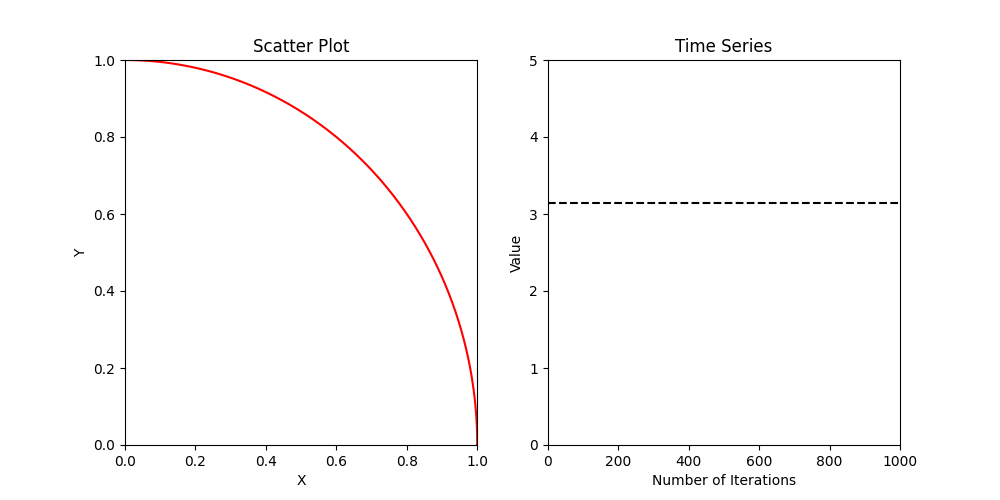

In [4]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Create the figure with two subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Initialize empty data for scatter plot (ax1)
x_in, x_out, y_in, y_out = [], [], [], []
theta = np.linspace(0, 2 * np.pi, 500)
circle_x = np.cos(theta)
circle_y = np.sin(theta)
ax1.plot(circle_x, circle_y, color='red', label=r'$x^2 + y^2 = 1$')

scatter_in = ax1.scatter([], [], s=30, color='green', label="Inside Circle")
scatter_out = ax1.scatter([], [], s=30, color='purple', label="Outside Circle")

pi_text = fig.text(0.75, 0.85, '', fontsize=12, color='blue', ha='left')
error_text = fig.text(0.75, 0.8, '', fontsize=12, color='red', ha='left')


ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.set_xlabel('Number of Iterations')
ax2.set_ylabel('Value')
ax1.set_title('Scatter Plot')


# Initialize empty data for time series plot (ax2)
time_series_x = []
time_series_y = []
pi_error_estimates = []
line, = ax2.plot([], [], color='green')
line_up, = ax2.plot([], [], color='red')
line_down, = ax2.plot([], [], color='purple')

ax2.set_xlim(0, 1000)  # Time series will have a fixed X range
ax2.set_ylim(0, 5)  # Y values are between 0 and 1
ax2.set_title('Time Series')

# Update function for both plots
def update(frame):
    update.N += 1
    # Add random points for the scatter plot
    x, y = np.random.rand(), np.random.rand()
    if x ** 2 + y ** 2 <= 1:  
        x_in.append(x)
        y_in.append(y)
        scatter_in.set_offsets(np.c_[x_in, y_in])
    else:
        x_out.append(x)
        y_out.append(y)
        scatter_out.set_offsets(np.c_[x_out, y_out])

    # Update the time series plot
    p_hat = len(x_in) / (len(x_in) + len(x_out))
    pi_estimate = 4 * p_hat
    time_series_y.append(pi_estimate)
    pi_error_estimate = 4 * (((p_hat * (1 - p_hat)) / update.N) ** .5)
    pi_error_estimates.append(pi_error_estimate)

    # Update the line plot with error bars
    line.set_data(range(len(time_series_y)), time_series_y)
    line_up.set_data(range(len(time_series_y)), np.array(time_series_y) + np.array(pi_error_estimates))
    line_down.set_data(range(len(time_series_y)), np.array(time_series_y) - np.array(pi_error_estimates))

    ax2.set_xlim(0, len(time_series_y) - 1)


    pi_text.set_text(f"Pi Estimate: {pi_estimate:.5f}")
    error_text.set_text(f"Error (1 std): ±{pi_error_estimate:.5f}")

    return scatter_in, scatter_out, line, line_up, line_down  # Return all plot objects for blitting

update.N = 0

plt.axhline(y=np.pi, color='black', linestyle='--', label='Pi (3.14159...)')

# Create the animation: 50 frames, interval of 1000ms (1s)
anim = FuncAnimation(fig, update, frames=50, interval=100, blit=True)
# anim.save("TLI.gif", dpi=300, writer=PillowWriter(fps=10))

# Show the plot once and let the animation run
plt.show()